## Notebook: Assumptions for Linear Regression

### Introduction

Here we will explore the key assumptions underlying linear regression models. Understanding these assumptions is crucial for building valid and reliable regression models.

### Learning Objectives

* Explain why linear regression assumptions are important

* List and describe the four main assumptions (LINE)

* Diagnose assumption violations using visualizations and statistical tests

* Apply appropriate remedies when assumptions are violated

### The LINE Assumptions

We'll use the acronym LINE to remember the four main assumptions:

1. Linearity

2. Independence

3. Normality

4. Equal Variance (Homoscedasticity)

### 1. Linearity Assumption

The relationship between predictors and the target variable should be linear.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
import pandas as pd
import seaborn as sns

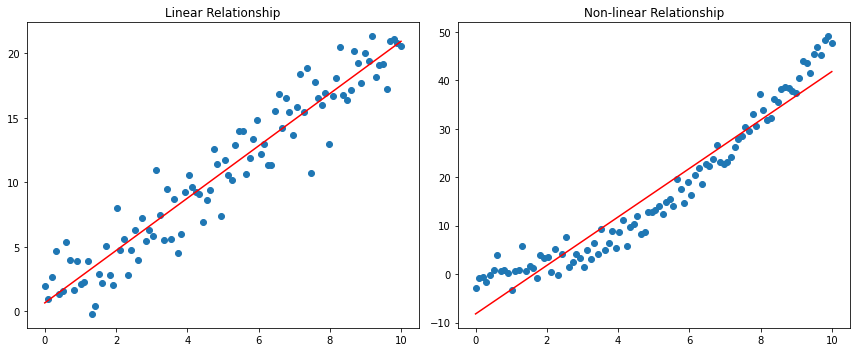

Linear data rainbow test p-value: 0.7980555661719597
Non-linear data rainbow test p-value: 4.076640263634793e-10


In [7]:
# Generate linear data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(scale=2, size=100)

# Generate non-linear data
y_nonlinear = 0.5 * X**2 + np.random.normal(scale=2, size=100)

# Fit models
model_linear = sm.OLS(y, sm.add_constant(X)).fit()
model_nonlinear = sm.OLS(y_nonlinear, sm.add_constant(X)).fit()

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear relationship
axes[0].scatter(X, y)
axes[0].plot(X, model_linear.predict(sm.add_constant(X)), color='red')
axes[0].set_title('Linear Relationship')

# Non-linear relationship
axes[1].scatter(X, y_nonlinear)
axes[1].plot(X, model_nonlinear.predict(sm.add_constant(X)), color='red')
axes[1].set_title('Non-linear Relationship')

plt.tight_layout()
plt.show()

# Rainbow test results
print("Linear data rainbow test p-value:", linear_rainbow(model_linear)[1])
print("Non-linear data rainbow test p-value:", linear_rainbow(model_nonlinear)[1])

#### Interpretation
* The left plot shows data that meets the linearity assumption

* The right plot shows a clear quadratic pattern that violates linearity

* The rainbow test p-value for the linear data is > 0.05 (assumption holds)

* The p-value for non-linear data is < 0.05 (assumption violated)

### 2. Independence Assumption

* No correlation between predictor variables (no multicollinearity)

* No correlation between residuals (no autocorrelation)

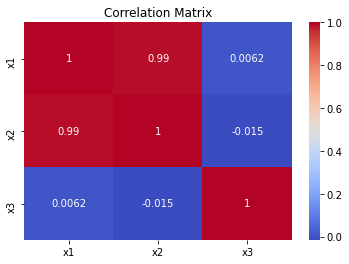

In [8]:
# Create correlated features
np.random.seed(42)
x1 = np.linspace(0, 10, 100)
x2 = x1 * 2 + np.random.normal(scale=1, size=100)
x3 = np.random.normal(size=100)  # Uncorrelated feature

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



#### Interpretation
* x1 and x2 are highly correlated (r = 0.99)

* x3 is uncorrelated with the others (good)

### 3. Normality Assumption

The residuals should be normally distributed.

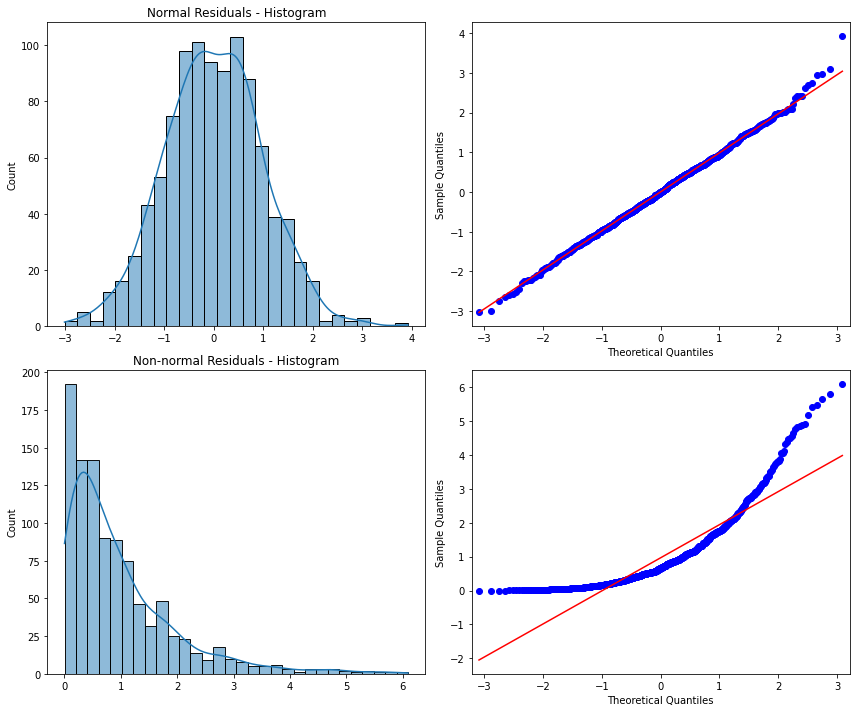

In [10]:
# Generate normal and non-normal residuals
residuals_normal = np.random.normal(size=1000)
residuals_nonnormal = np.random.exponential(size=1000)

# Plot histograms and Q-Q plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Normal residuals
sns.histplot(residuals_normal, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Normal Residuals - Histogram')
sm.qqplot(residuals_normal, line='s', ax=axes[0, 1])

# Non-normal residuals
sns.histplot(residuals_nonnormal, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Non-normal Residuals - Histogram')
sm.qqplot(residuals_nonnormal, line='s', ax=axes[1, 1])

plt.tight_layout()
plt.show()



#### Interpretation
Normal residuals show bell curve and follow Q-Q line

Non-normal residuals are skewed and deviate from Q-Q line

### 4. Equal Variance (Homoscedasticity)

The variance of residuals should be constant across all values of the predicted variable.

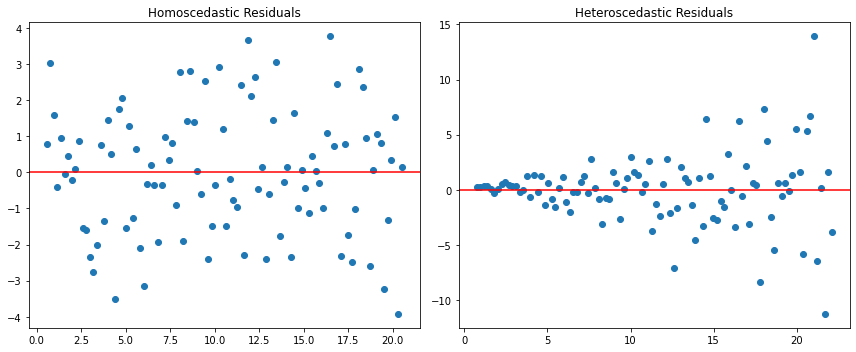

Homoscedastic BP p-value: 0.2772216992044507
Heteroscedastic BP p-value: 2.575748926908021e-05


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Generate homoscedastic and heteroscedastic data
y_homo = 2 * X + 1 + np.random.normal(scale=2, size=100)
y_hetero = 2 * X + 1 + np.random.normal(scale=X/2, size=100)

# Fit models
model_homo = sm.OLS(y_homo, sm.add_constant(X)).fit()
model_hetero = sm.OLS(y_hetero, sm.add_constant(X)).fit()

# Plot residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Homoscedastic
axes[0].scatter(model_homo.predict(), model_homo.resid)
axes[0].axhline(y=0, color='red')
axes[0].set_title('Homoscedastic Residuals')

# Heteroscedastic
axes[1].scatter(model_hetero.predict(), model_hetero.resid)
axes[1].axhline(y=0, color='red')
axes[1].set_title('Heteroscedastic Residuals')

plt.tight_layout()
plt.show()

#### Interpretation
Homoscedastic residuals show consistent spread

Heteroscedastic residuals show funnel shape (changing variance)

### Key Takeaways
* Always check assumptions after fitting a regression model

* Visualizations provide intuitive understanding of violations

* Statistical tests offer objective measures